In [1]:
import json

import numpy as np
from matplotlib import pyplot as plt

In [ ]:
with open('out.json', 'r') as f:
    data = json.load(f)

In [ ]:
for i in data:
    plt.plot([j['mse_avr'] for j in i['data']])
    plt.show()
# plt.show()

In [ ]:
for i in range(len(data[0]['data'])):
    l = [data[j]['data'][i]['mse_avr'] for j in range(len(data))]
    plt.hist(l, bins=25)
    plt.xticks(np.arange(int(min(l)), int(max(l))+1, 4))
    for tick in plt.gca().get_xticklabels():
        tick.set_rotation(45)
    plt.show()

In [ ]:
l = [data[j]['data'][-1]['mse_avr'] for j in range(len(data))]

np.mean(l)

In [22]:
DIR = f'mlr/simulation_7'

In [23]:
with open(f'{DIR}/mse.json', 'r') as i:
    mse_avr = json.load(i)

In [24]:
MU = 50
SIGMA = 2
N = 12

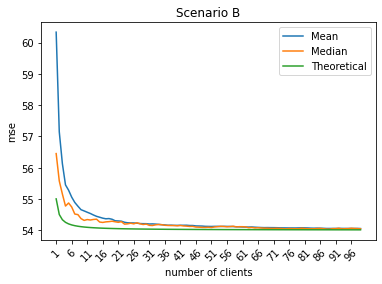

In [25]:
mse = []
mse_median = []

for i in range(len(mse_avr[0]['data'])):
    mse.append(np.mean([mse_avr[j]['data'][i]['mse_avr'] for j in range(len(mse_avr))]))
    mse_median.append(np.median([mse_avr[j]['data'][i]['mse_avr'] for j in range(len(mse_avr))]))

t = np.array([MU / (x * (N - 2)) + SIGMA**2 * (x - 1) / x + MU for x in range(1, len(mse) + 1)])

x = [i for i in range(1, len(mse) + 1)]

plt.plot(x, mse)
plt.plot(x, mse_median)
plt.plot(x, t)

plt.title('Scenario B')

plt.legend(['Mean', 'Median', 'Theoretical'])

plt.xlabel('number of clients')
plt.ylabel('mse')

plt.xticks([i for i in range(1, len(mse), 5)])
for tick in plt.gca().get_xticklabels():
    tick.set_rotation(45)

plt.savefig(fname=f'{DIR}/scenario_B.png', facecolor='white')

plt.show()

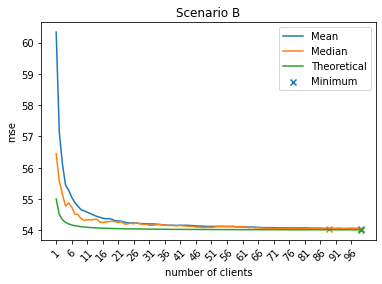

In [26]:
plt.plot(x, mse)
plt.plot(x, mse_median)
plt.plot(x, t)

min_mse = min(mse)
min_mse_median = min(mse_median)
min_t = min(t)

x_min_mse = np.where(mse == min_mse)
x_min_mse_median = np.where(mse_median == min_mse_median)
x_min_t = np.where(t == min_t)

plt.scatter(x_min_mse[0] + 1, min_mse, marker='x')
plt.scatter(x_min_mse_median[0] + 1, min_mse_median, marker='x')
plt.scatter(x_min_t[0] + 1, min_t, marker='x')

plt.title('Scenario B')

plt.legend(['Mean', 'Median', 'Theoretical', 'Minimum'])

plt.xlabel('number of clients')
plt.ylabel('mse')

plt.xticks([i for i in range(1, len(mse), 5)])
for tick in plt.gca().get_xticklabels():
    tick.set_rotation(45)

plt.savefig(fname=f'{DIR}/scenario_B_min.png', facecolor='white')

plt.show()

In [27]:
COST = 1
T = 100

LAMBDA = 0.1
S = 0.1

ALPHA_TDMA = np.abs((MU / (N - 2) - (MU / (N - 2) - SIGMA**2) / T - SIGMA**2) / ( COST * T ))
ALPHA_ALOHA = np.abs((MU / (N - 2) - (MU / (N - 2) - SIGMA**2) / T - SIGMA**2) / ( np.exp(2 * LAMBDA * S * T) ))

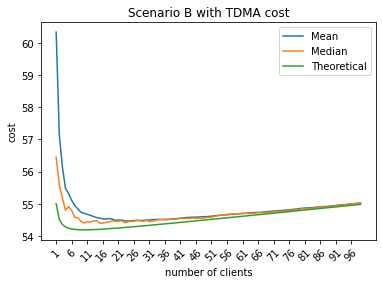

In [28]:
mse_tdma = [item + ALPHA_TDMA * COST * num_players for num_players, item in enumerate(mse)]
mse_median_tdma = [item + ALPHA_TDMA * COST * num_players for num_players, item in enumerate(mse_median)]
t_tdma = [item + ALPHA_TDMA * COST * num_players for num_players, item in enumerate(t)]

plt.plot(x, mse_tdma)
plt.plot(x, mse_median_tdma)

plt.plot(x, t_tdma)

plt.title('Scenario B with TDMA cost')

plt.legend(['Mean', 'Median', 'Theoretical'])

plt.xlabel('number of clients')
plt.ylabel('cost')

plt.xticks([i for i in range(1, len(t_tdma) + 1, 5)])
for tick in plt.gca().get_xticklabels():
    tick.set_rotation(45)

plt.savefig(fname=f'{DIR}/scenario_B_tdma.png', facecolor='white')

plt.show()

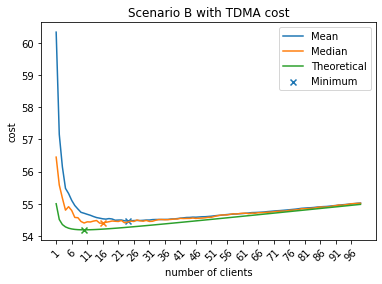

In [29]:
plt.plot(x, mse_tdma)
plt.plot(x, mse_median_tdma)
plt.plot(x, t_tdma)

min_mse_tdma = min(mse_tdma)
min_mse_median_tdma = min(mse_median_tdma)
min_t_tdma = min(t_tdma)

x_min_mse = np.where(mse_tdma == min_mse_tdma)
x_min_mse_median = np.where(mse_median_tdma == min_mse_median_tdma)
x_min_t = np.where(t_tdma == min_t_tdma)

plt.scatter(x_min_mse[0] + 1, min_mse_tdma, marker='x')
plt.scatter(x_min_mse_median[0] + 1, min_mse_median_tdma, marker='x')
plt.scatter(x_min_t[0] + 1, min_t_tdma, marker='x')

plt.title('Scenario B with TDMA cost')

plt.legend(['Mean', 'Median', 'Theoretical', 'Minimum'])

plt.xlabel('number of clients')
plt.ylabel('cost')

plt.xticks([i for i in range(1, len(t_tdma) + 1, 5)])
for tick in plt.gca().get_xticklabels():
    tick.set_rotation(45)

plt.savefig(fname=f'{DIR}/scenario_B_tdma_min.png', facecolor='white')

plt.show()

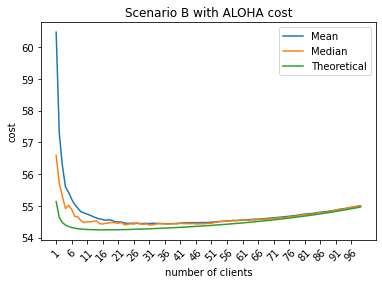

In [30]:
mse_aloha = [item + ALPHA_ALOHA * np.exp(2 * LAMBDA * S * num_players) for num_players, item in enumerate(mse)]
mse_median_aloha = [item + ALPHA_ALOHA * np.exp(2 * LAMBDA * S * num_players) for num_players, item in enumerate(mse_median)]
t_aloha = [item + ALPHA_ALOHA * np.exp(2 * LAMBDA * S * num_players) for num_players, item in enumerate(t)]

plt.plot(x, mse_aloha)
plt.plot(x, mse_median_aloha)
plt.plot(x, t_aloha)

plt.title('Scenario B with ALOHA cost')

plt.legend(['Mean', 'Median', 'Theoretical'])

plt.xlabel('number of clients')
plt.ylabel('cost')

plt.xticks(np.arange(1, len(t_aloha) + 1, 5))
for tick in plt.gca().get_xticklabels():
    tick.set_rotation(45)

plt.savefig(fname=f'{DIR}/scenario_B_aloha.png', facecolor='white')

plt.show()

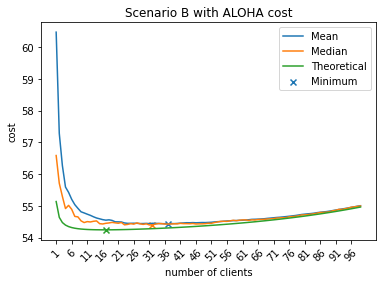

In [31]:
plt.plot(x, mse_aloha)
plt.plot(x, mse_median_aloha)
plt.plot(x, t_aloha)

min_mse_aloha = min(mse_aloha)
min_mse_median_aloha = min(mse_median_aloha)
min_t_aloha = min(t_aloha)

x_min_mse = np.where(mse_aloha == min_mse_aloha)
x_min_mse_median = np.where(mse_median_aloha == min_mse_median_aloha)
x_min_t = np.where(t_aloha == min_t_aloha)

plt.scatter(x_min_mse[0] + 1, min_mse_aloha, marker='x')
plt.scatter(x_min_mse_median[0] + 1, min_mse_median_aloha, marker='x')
plt.scatter(x_min_t[0] + 1, min_t_aloha, marker='x')

plt.title('Scenario B with ALOHA cost')

plt.legend(['Mean', 'Median', 'Theoretical', 'Minimum'])

plt.xlabel('number of clients')
plt.ylabel('cost')

plt.xticks(np.arange(1, len(t_aloha) + 1, 5))
for tick in plt.gca().get_xticklabels():
    tick.set_rotation(45)

plt.savefig(fname=f'{DIR}/scenario_B_aloha_min.png', facecolor='white')

plt.show()